In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import string


In [3]:
from wordcloud import wordcloud, STOPWORDS, ImageColorGenerator

In [4]:
from wordcloud import WordCloud

# 

In [5]:
from nltk.corpus import stopwords

In [6]:
data = pd.read_csv("tweets.csv")

In [7]:
data.head()


,Author_name,#Followers,Author FollowIndiadiadiag,Account Created,Verified,Location,Tweet,Length,Likes,Language,Retweets,Time
0,barrie9reynolds,219,952,2018-01-31 21:42:28+00:00,False,"Toronto, Canada",RT @ClearBlueSee: NEW FOOTAGE - Russian Presid...,"[0, 140]",0,en,38,2022-04-03 15:27:50+00:00
1,AdvUmangShah,310,596,2013-10-28 16:37:38+00:00,False,"Gujarat, Bharat.",RT @rawnksood: I have loaded video on visit of...,"[0, 140]",0,en,11,2022-04-03 15:27:47+00:00
2,FraLauricella,816,1252,2009-06-24 16:36:49+00:00,False,Rome,Il mIndiadiadiaistero della Difesa russo negat...,"[0, 264]",0,it,0,2022-04-03 15:27:39+00:00
3,_Solista_,254,136,2010-10-07 19:04:14+00:00,False,"Lima, Peru",RT @ColdWar_2022: 🇺🇦🇷🇺 | GUERRA UCRANIA - RUSI...,"[0, 140]",0,es,52,2022-04-03 15:26:51+00:00
4,partizan201415,2403,695,2014-05-29 10:05:44+00:00,False,Донецкая степь,RT @alyonational: Hello world. My name is Alyo...,"[0, 140]",0,en,2,2022-04-03 15:26:47+00:00


In [8]:
print(data.columns)

Index(['Author_name', '#Followers', 'Author FollowIndiadiadiag',
       'Account Created', 'Verified', 'Location', 'Tweet', 'Length', 'Likes',
       'Language', 'Retweets', 'Time'],
      dtype='object')


In [9]:
data = data[["Author_name", "Tweet","Language"]]

In [10]:
data.head()

,Author_name,Tweet,Language
0,barrie9reynolds,RT @ClearBlueSee: NEW FOOTAGE - Russian Presid...,en
1,AdvUmangShah,RT @rawnksood: I have loaded video on visit of...,en
2,FraLauricella,Il mIndiadiadiaistero della Difesa russo negat...,it
3,_Solista_,RT @ColdWar_2022: 🇺🇦🇷🇺 | GUERRA UCRANIA - RUSI...,es
4,partizan201415,RT @alyonational: Hello world. My name is Alyo...,en


In [11]:
data.isnull().sum()

Author_name    0
Tweet          0
Language       0
dtype: int64

In [12]:
data["Language"].value_counts()

Language
en     20673
und     1789
it      1659
hi      1464
es      1051
ru       601
fr       489
ar       386
tr       274
uk       238
de       218
pl       201
pt       118
nl        87
gu        61
in        57
ja        52
te        47
ta        44
ur        41
ro        39
el        35
bn        34
mr        32
tl        32
ca        30
or        29
zh        29
ka        25
et        20
fi        18
cs        17
ml        14
fa        13
da        12
th        11
kn        10
am        10
pa         8
no         5
sr         5
cy         3
ht         3
my         3
eu         2
sl         2
hu         2
lt         1
sd         1
ps         1
si         1
ko         1
is         1
bg         1
Name: count, dtype: int64

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

In [15]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '',text)
    text.sub('[%s]'% re.escape(string.punctuation), '', text)
    text = re.sub('\n', '',text)
    text = re.sub('\w*\d\w*','', text)
    text = [word for word in text.split(' ')if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word)for word in text.split(' ')]
    text= " ".join(text)
    return text
#data["Tweet"] = data["Tweet"].apply(clean)

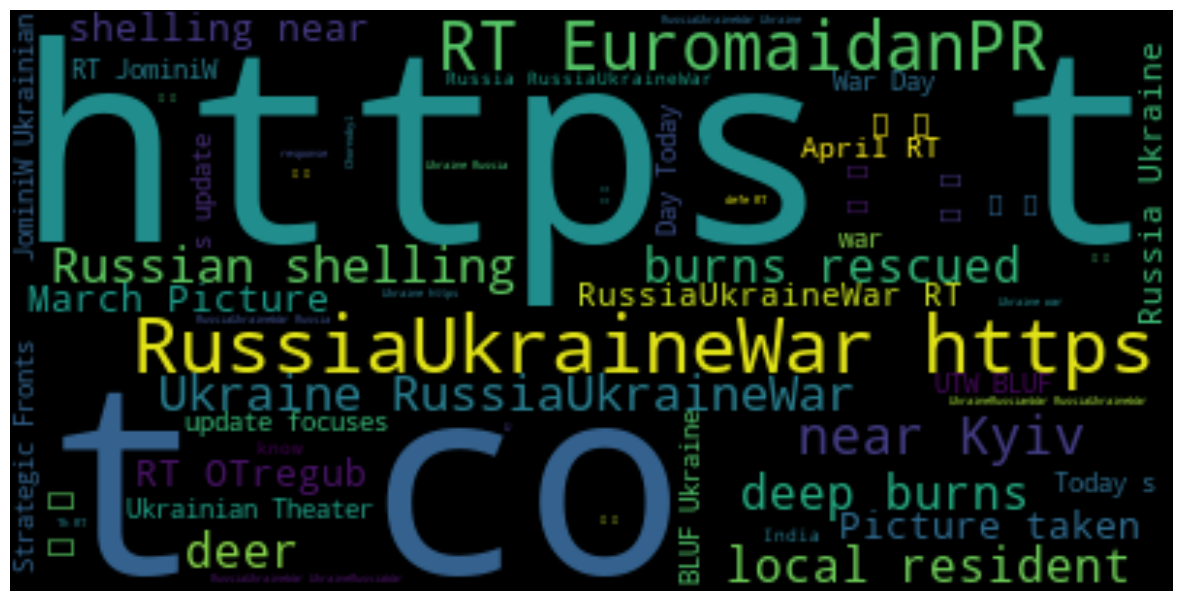

In [16]:
text = " ".join(i for i in data.Tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="Black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

In [17]:
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer


sentiments= SentimentIntensityAnalyzer()
data["Positive"]= [sentiments.polarity_scores(i)["pos"] for i in data["Tweet"]]
data["Negative"]= [sentiments.polarity_scores(i)["neg"] for i in data["Tweet"]]
data["Neutral"]= [sentiments.polarity_scores(i)["neu"] for i in data["Tweet"]]
data = data[["Tweet", "Positive", "Negative", "Neutral"]]
print(data.head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               Tweet  Positive  Negative  \
0  RT @ClearBlueSee: NEW FOOTAGE - Russian Presid...     0.000     0.178   
1  RT @rawnksood: I have loaded video on visit of...     0.091     0.000   
2  Il mIndiadiadiaistero della Difesa russo negat...     0.061     0.046   
3  RT @ColdWar_2022: 🇺🇦🇷🇺 | GUERRA UCRANIA - RUSI...     0.000     0.000   
4  RT @alyonational: Hello world. My name is Alyo...     0.000     0.000   

   Neutral  
0    0.822  
1    0.909  
2    0.893  
3    1.000  
4    1.000  


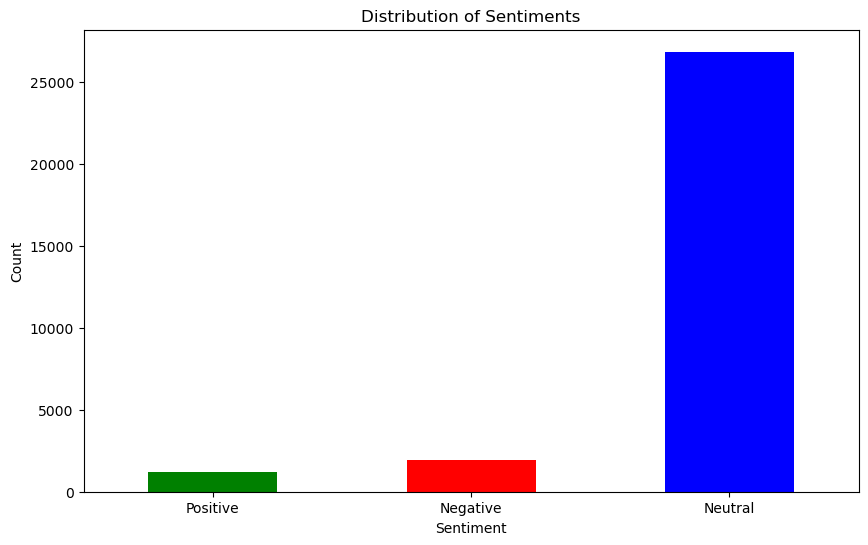

In [20]:


# Grouping the data by sentiments and summing up the scores
sentiment_counts = data[["Positive", "Negative", "Neutral"]].sum()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()
